In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
df = pd.read_csv("Resources\pokemon_combats_etl.csv")
df.head()

,Unnamed: 0,first_bug,first_dark,first_dragon,first_electric,first_fairy,first_fighting,first_fire,first_flying,first_ghost,...,second_rock,second_steel,second_water,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,70,70,40,60,40,60,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,91,129,90,72,90,108,1
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,75,75,75,125,95,40,1
3,3,0,0,0,0,0,0,1,0,0,...,0,0,0,77,120,90,60,90,48,1
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,20,10,230,10,230,5,0


In [2]:
# Split our preprocessed data into our features and target arrays
df.drop('Unnamed: 0', axis=1, inplace=True)
X = df.drop("winner", axis=1)
y = df["winner"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [3]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(tf.keras.layers.Dense(units=90, activation="relu", input_dim=48))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 844us/step - accuracy: 0.8055 - loss: 0.4384
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.9050 - loss: 0.2798
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.9353 - loss: 0.1870
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.9472 - loss: 0.1570
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.9499 - loss: 0.1410
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.9559 - loss: 0.1325
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.9602 - loss: 0.1209
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9613 - loss: 0.1127
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.9625 - loss: 0.1105
Epoch 10/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.9672 - loss: 0.1043
Epoch 11/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.9679 - loss: 0.0938
Epoch 12/100
938/938 ━━━━━━━━━━

In [5]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

391/391 - 0s - 824us/step - accuracy: 0.9512 - loss: 0.3284
Loss: 0.32844647765159607, Accuracy: 0.951200008392334


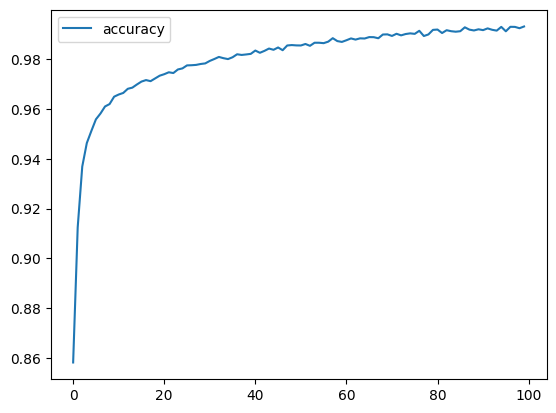

In [6]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(fit_model.history)
history_df.plot(y="accuracy")
plt.show()

In [7]:
def pokemon_nn(layers=1, optimizer='adam', activation='relu', neurons=64, epochs=100):

    nn = tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=neurons, activation=activation, input_dim=48))
    for _ in range(layers):
        nn.add(tf.keras.layers.Dense(units=neurons, activation=activation))  # Hidden layers
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    nn.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)

    return nn

In [8]:
model = KerasClassifier(build_fn=pokemon_nn, verbose=0, neurons=64, activation='relu', layers=2)

param_dist = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'LeakyReLU'],
    'neurons': [64, 128, 256],
    'layers': [1, 2, 3],
    'epochs': [50, 100, 150]
    }

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=3)
random_search.fit(X_train_scaled, y_train)
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)


C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future r

Best parameters found:  {'optimizer': 'rmsprop', 'neurons': 256, 'layers': 1, 'epochs': 50, 'activation': 'relu'}
Best score found:  0.9806333333333334


In [10]:
param_grid = {
    'optimizer': ['rmsprop'],
    'activation': ['relu'],
    'neurons': [256],
    'layers': [1, 2],
    'epochs': [25, 50, 75]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\mrrit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future r